In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the data and previewing the some of it
df = pd.read_csv('waterQuality.csv')
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [3]:
print (df.shape)
print('\n')
df.info()

(7999, 21)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float6

In [4]:
df.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [5]:
df['ammonia'].value_counts()['#NUM!']


3

In [6]:
#we see ammonia and is_safe is object so we will convert it to numeric
# Before that we will drop the entry with #NUM! i.e. missing values
df = df[df['ammonia'].str.contains('#NUM!') == False]

df['ammonia'] = pd.to_numeric(df['ammonia'])
df['is_safe'] = pd.to_numeric(df['is_safe'])

In [7]:
df.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,...,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.666396,14.278212,0.161477,1.567928,0.042803,2.177589,0.247300,0.805940,0.771646,0.319714,...,0.099431,9.819250,1.329846,0.005193,16.465266,2.920106,0.049684,0.147811,0.044672,0.114057
std,1.265323,8.878930,0.252632,1.216227,0.036049,2.567210,0.270663,0.653595,0.435423,0.329497,...,0.058169,5.541977,0.573271,0.002967,17.688827,2.322805,0.028773,0.143569,0.026906,0.317900
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.407500,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.745000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.132500,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


In [8]:
# Counting the records with the water safe/unsafe to drink
df['is_safe'].value_counts()

0    7084
1     912
Name: is_safe, dtype: int64

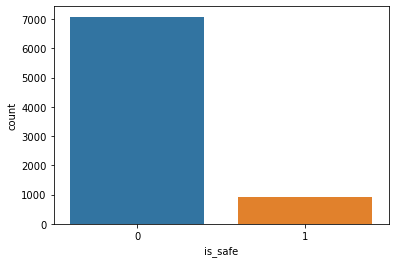

In [9]:
ax = sns.countplot(x=df['is_safe'], data=df)
plt.show()

We can see the data is imbalanced so we will be using the oversampling technique to get same number of rows for both variable

In [10]:
col = df.columns
col = [c for c in col if c not in ['is_safe']]
y = df['is_safe'] 
X = df[col]

ros = RandomOverSampler(sampling_strategy='minority')
X, y = ros.fit_resample(X, y) #y_train as balanced target variable
print(X.shape[0] - df.shape[0], 'new random picked points')

6172 new random picked points


In [11]:
X

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
0,1.65,9.08,0.040,2.85,0.007,0.35,0.83,0.17,0.05,0.20,0.000,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02
1,2.32,21.16,0.010,3.31,0.002,5.28,0.68,0.66,0.90,0.65,0.650,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05
2,1.01,14.02,0.040,0.58,0.008,4.24,0.53,0.02,0.99,0.05,0.003,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01
3,1.36,11.33,0.040,2.96,0.001,7.23,0.03,1.66,1.08,0.71,0.710,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05
4,0.92,24.33,0.030,0.20,0.006,2.67,0.69,0.57,0.61,0.13,0.001,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14163,0.04,5.62,0.030,0.58,0.080,0.01,0.01,0.07,0.25,0.04,0.003,0.135,2.40,0.47,0.010,7.45,0.10,0.09,0.07,0.02
14164,0.19,6.42,0.720,4.48,0.030,6.70,0.72,0.04,1.37,0.84,0.840,0.032,5.34,1.56,0.007,23.36,1.16,0.07,0.01,0.00
14165,2.46,9.90,0.001,1.09,0.008,5.87,0.57,0.37,0.95,0.00,0.000,0.072,2.98,1.95,0.002,26.27,4.53,0.02,0.11,0.02
14166,2.80,23.13,0.040,0.12,0.006,3.67,0.29,0.98,0.27,0.20,0.005,0.012,8.32,1.02,0.004,24.98,0.74,0.07,0.45,0.08


In [12]:
y

0        1
1        1
2        0
3        1
4        1
        ..
14163    1
14164    1
14165    1
14166    1
14167    1
Name: is_safe, Length: 14168, dtype: int64

X and y are features and target variable respectively

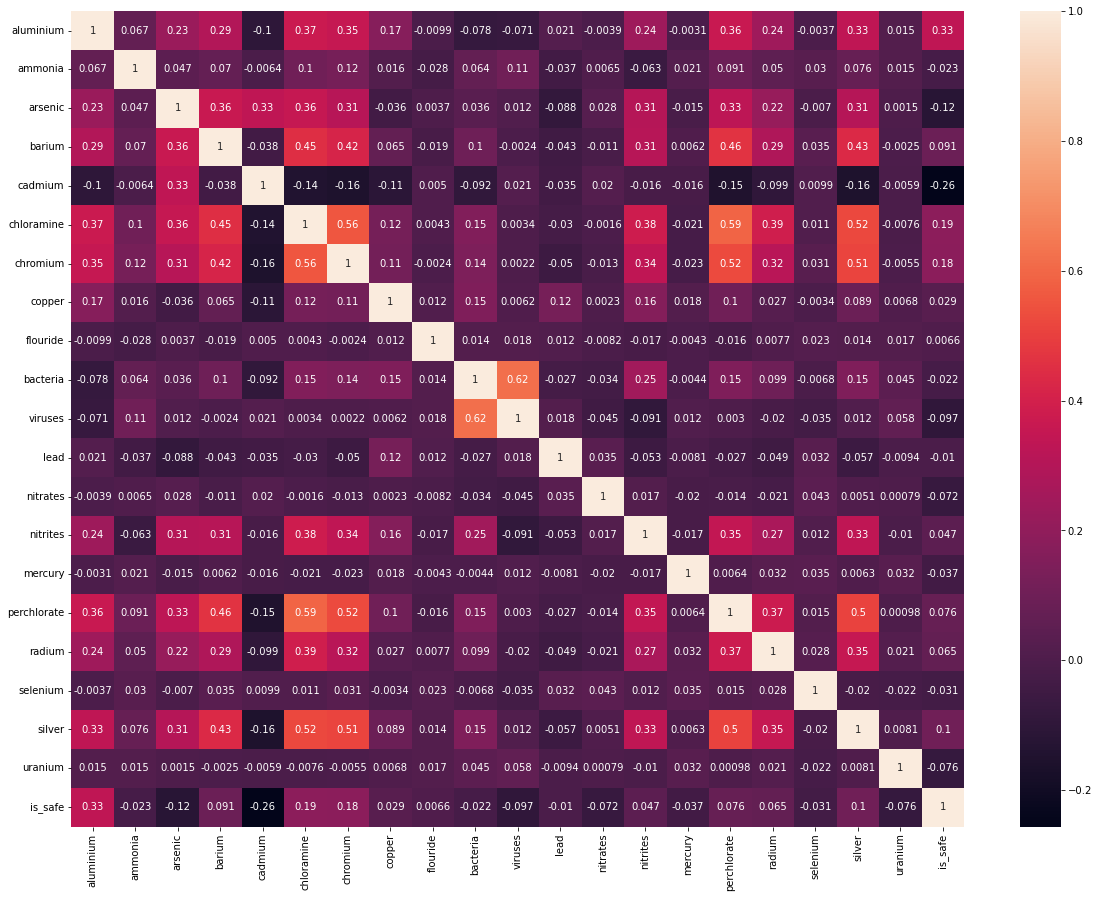

In [13]:
#Looking into the correlation matrix
# Set figure size
plt.figure(figsize=(20, 15))

# Create heatmap
sns.heatmap(df.corr(), annot=True)

# Show plot
plt.show()

In [14]:
# Split data into training and testing dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Building a model

In [15]:
# setting different models to be tested
lr = LogisticRegression()
rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()
xgb = GradientBoostingClassifier()
knn = KNeighborsClassifier()

We will used random search to find the best result from random parameters

In [16]:
lr_params = {
    'penalty' : ['l1', 'l2'],
    'C' : np.linspace(0, 5, 10)}

# Instantiate cross validated logistic regression random search 
rs_lr = RandomizedSearchCV(estimator=lr, param_distributions=lr_params, cv=5)

# Fit lr to trainig data
rs_lr.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
       2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ]),
                                        'penalty': ['l1', 'l2']})

In [17]:
rfc_params = {   
    'n_estimators' : [*range(25, 400, 20)],
    'criterion' : ['gini', 'entropy'],
    'max_depth': [*range(1, 11)],
    'min_samples_split' : [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4]}

# Instantiate cross validated random forest random search
rs_rfc = RandomizedSearchCV(estimator=rfc, param_distributions=rfc_params, cv=5)

# Fit rfc to trainig data
rs_rfc.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 4, 6, 8],
                                        'n_estimators': [25, 45, 65, 85, 105,
                                                         125, 145, 165, 185,
                                                         205, 225, 245, 265,
                                                         285, 305, 325, 345,
                                                         365, 385]})

In [18]:
dtc_params = {
    'criterion' : ['gini', 'entropy'],
    'splitter' : ['best', 'random'],
    'max_depth': [*range(1, 11)],
    'min_samples_split' : [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4]}

# Instantiate cross validated desicion tree random search 
rs_dtc = RandomizedSearchCV(estimator=dtc, param_distributions=dtc_params, cv=5)

# Fit dtc to trainig data
rs_dtc.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 4, 6, 8],
                                        'splitter': ['best', 'random']})

In [19]:
xgb_params = {
    'loss' : ['deviance', 'exponential'],
    'learning_rate' : np.linspace(0, 1, 10),
    'n_estimators' : [*range(25, 500, 10)]}

# Instantiate cross validated extreme gradient boosting random search 
rs_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=xgb_params, cv=5)

# Fit xgb to training data 
rs_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                                        'loss': ['deviance', 'exponential'],
                                        'n_estimators': [25, 35, 45, 55, 65, 75,
                                                         85, 95, 105, 115, 125,
                                                         135, 145, 155, 165,
                                                         175, 185, 195, 205,
                                                         215, 225, 235, 245,
                                                         255, 265, 275, 285,
                                                         295, 305, 315, ...]})

In [20]:
knn_params = {
    'n_neighbors' : [*range(1, 11)],
    'weights' : ['uniform', 'distant'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree' 'brute'],
    'leaf_size' : [10, 20, 30, 40]}

# Instantiate cross validated k-nearest neighbor random search 
rs_knn = RandomizedSearchCV(estimator=knn, param_distributions=knn_params, cv=5)

# Fit knn to training data 
rs_knn.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_treebrute'],
                                        'leaf_size': [10, 20, 30, 40],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10],
                                        'weights': ['uniform', 'distant']})

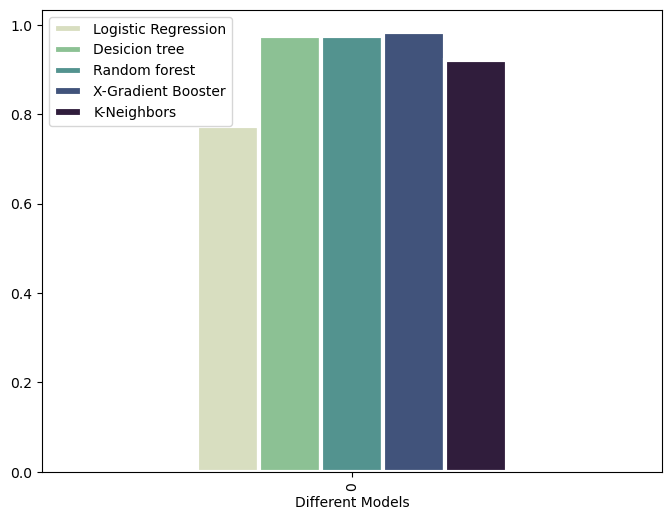

In [21]:
score_df =  pd.DataFrame({'Logistic Regression' :  [rs_lr.best_score_] ,'Desicion tree' : [rs_dtc.best_score_], \
'Random forest' : [rs_rfc.best_score_],'X-Gradient Booster': [rs_xgb.best_score_] ,'K-Neighbors' : [rs_knn.best_score_]})

# Plotting bar diagram
plt.style.use('default')
color_palette = sns.cubehelix_palette(start=.6, rot=-.80, as_cmap=True)
score_df.plot(kind='bar', edgecolor='white', colormap=color_palette, linewidth=3, figsize=(8, 6), xlabel='Different Models')

# Show plot
plt.show()

In [22]:
df_1 = score_df.melt()
df_1.rename(columns={'variable': 'Model', 'value': 'Score'})

,Model,Score
0,Logistic Regression,0.773867
1,Desicion tree,0.974943
2,Random forest,0.974502
3,X-Gradient Booster,0.984560
4,K-Neighbors,0.920681


#### We can see the X gradient booster model have the highest accuracy score for training data now we will be using this model to find the accuracy for the test data

In [23]:
xgb = GradientBoostingClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
print('Accuracy Score: ', accuracy_score(y_test, y_pred,) * 100.0)

Accuracy Score:  95.94213126323218
